In [3]:
import os
import yaml
import pickle as pkl
import json
import matplotlib.pyplot as plt
import numpy as np
# from models import eval
# from utils import DotDict

In [4]:
global CFG
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)

In [74]:
#res_path = os.path.join(CFG["datadir"], "EVAL_gs_disc_poly_sk_" + input_type)
#with open(res_path, "rb") as f:
#    test_results_sk = pkl.load(f)

In [9]:
input_type = "matMul"
rep_type = "ft"
res_path = os.path.join(CFG["datadir"], "EVAL_gs_atn_disc_poly_topK_disc_poly_" + rep_type + "_" + input_type)
with open(res_path, "rb") as f:
    test_results = pkl.load(f)
get_best_params(test_results, 'all', False, False)

Evaluated for lr= [dict_keys([1e-05, 1e-06])], bs=[dict_keys([64, 512])]


((1e-05, 64), (1e-05, 64))

In [11]:
sorted(test_results[1e-05][64][0].items())

[('acc_all', 2.243158366980709),
 ('acc_cie', 3.869448183041723),
 ('acc_cie_@10', 20.199641094661285),
 ('acc_clus', 2.7871242709735307),
 ('acc_clus_@10', 30.837819650067296),
 ('acc_dpt', 0.07290264692687304),
 ('acc_dpt_@10', 0.4374158815612382),
 ('f1_all', 0.7521648036509476),
 ('f1_cie', 1.0744973219833813),
 ('f1_cie_@10', 14.584810607273852),
 ('f1_clus', 1.1804220776433356),
 ('f1_clus_@10', 22.675255764796905),
 ('f1_dpt', 0.0015750113261260908),
 ('f1_dpt_@10', 0.275836839629252),
 ('precision_all', 0.9092902321365264),
 ('precision_cie', 1.4264465041835688),
 ('precision_cie_@10', 24.96526816653391),
 ('precision_clus', 1.3006271649002568),
 ('precision_clus_@10', 44.057671307228205),
 ('precision_dpt', 0.0007970273257533456),
 ('precision_dpt_@10', 0.3478332163671312),
 ('recall_all', 2.243158366980709),
 ('recall_cie', 3.869448183041723),
 ('recall_cie_@10', 20.199641094661285),
 ('recall_clus', 2.7871242709735307),
 ('recall_clus_@10', 30.837819650067296),
 ('recall_dpt

In [8]:
def get_best_params(test_results, handle, weight_decay, mid_size):
    best_acc = 0
    best_f1 = 0
    best_acc_keys = None
    best_f1_keys = None
    if not weight_decay and not mid_size:
        for lr in test_results.keys():
            for bs in test_results[lr].keys():
                if test_results[lr][bs][0]["acc_" + handle] > best_acc:
                    best_acc_keys = (lr, bs)
                    best_acc = test_results[lr][bs][0]["acc_" + handle]
                if test_results[lr][bs][0]["f1_" + handle] > best_f1:
                    best_f1_keys = (lr, bs)
                    best_f1 = test_results[lr][bs][0]["f1_" + handle]
        print("Evaluated for lr= [" + str(test_results.keys()) + "], bs=[" +  str(test_results[lr].keys()) + "]")

    elif weight_decay and not mid_size:
        for lr in test_results.keys():
            for bs in test_results[lr].keys():
                for wd in test_results[lr][bs].keys():
                    if test_results[lr][bs][wd][0]["acc_" + handle] > best_acc:
                        best_acc_keys = (lr, bs, wd)
                        best_acc = test_results[lr][bs][wd][0]["acc_" + handle]
                    if test_results[lr][bs][wd][0]["f1_" + handle] > best_f1:
                        best_f1_keys = (lr, bs, wd)
                        best_f1 = test_results[lr][bs][wd][0]["f1_" + handle]
        print("Evaluated for lr= [" + str(test_results.keys()) + "], bs=[" +  str(test_results[lr].keys()) +
              "], wd=[" + str(test_results[lr][bs].keys()) + "]")

    else:
        for lr in test_results.keys():
            for bs in test_results[lr].keys():
                for ms in test_results[lr][bs].keys():
                    if test_results[lr][bs][ms][0]["acc_" + handle] > best_acc:
                        best_acc_keys = (lr, bs, ms)
                        best_acc = test_results[lr][bs][ms][0]["acc_" + handle]
                    if test_results[lr][bs][ms][0]["f1_" + handle] > best_f1:
                        best_f1_keys = (lr, bs, ms)
                        best_f1 = test_results[lr][bs][ms][0]["f1_" + handle]
        print("Evaluated for lr= [" + str(test_results.keys()) + "], bs=[" +  str(test_results[lr].keys()) +
              "], ms=[" + str(test_results[lr][bs].keys()) + "]")
    return best_acc_keys, best_f1_keys

In [20]:
input_type = "hadamard"
rep_type = "ft"
res_path = os.path.join(CFG["datadir"], "EVAL_gs_wd_topK_disc_poly_" + rep_type + "_" + input_type)
with open(res_path, "rb") as f:
    test_results = pkl.load(f)
get_best_params(test_results, 'all', False, True)

Evaluated for lr= [dict_keys([0.0001, 1e-06, 1e-08])], bs=[dict_keys([512, 768, 1024])], ms=[dict_keys([50, 200, 600])]


((0.0001, 1024, 600), (1e-08, 768, 600))

In [21]:
sorted(test_results[1e-8][768][600][0].items())

[('acc_all', 3.0656497682069688),
 ('acc_cie', 4.267608793180798),
 ('acc_cie_@10', 29.727456258411845),
 ('acc_clus', 4.9069089277703),
 ('acc_clus_@10', 42.50785105428444),
 ('acc_dpt', 0.022431583669807086),
 ('acc_dpt_@10', 0.44302377747869),
 ('f1_all', 4.411017859841797),
 ('f1_cie', 6.156781430588998),
 ('f1_cie_@10', 28.61055951998297),
 ('f1_clus', 7.042378272512238),
 ('f1_clus_@10', 44.36217779624001),
 ('f1_dpt', 0.033893876424159065),
 ('f1_dpt_@10', 0.47398899152667934),
 ('precision_all', 32.30316212016098),
 ('precision_cie', 35.516658121366504),
 ('precision_cie_@10', 67.09837609679418),
 ('precision_clus', 61.322729540148266),
 ('precision_clus_@10', 81.59215905270152),
 ('precision_dpt', 0.07009869896814716),
 ('precision_dpt_@10', 4.766186345930627),
 ('recall_all', 3.0656497682069688),
 ('recall_cie', 4.267608793180798),
 ('recall_cie_@10', 29.727456258411845),
 ('recall_clus', 4.9069089277703),
 ('recall_clus_@10', 42.50785105428444),
 ('recall_dpt', 0.02243158366

input_type = "matMul"
bag_type = "cie"
rep_type = "sk"
res_path = os.path.join(CFG["datadir"], "EVAL_gs_wd_disc_spe_" + bag_type + "_" + rep_type + "_" + input_type )
with open(res_path, "rb") as f:
    test_results_ft = pkl.load(f)

get_best_params(test_results_ft, bag_type, False, False)

In [22]:
sorted(test_results[0.0001][1024][600][0].items())

[('acc_all', 3.3647375504710633),
 ('acc_cie', 7.2734410049349485),
 ('acc_cie_@10', 29.676985195154774),
 ('acc_clus', 2.3833557649170034),
 ('acc_clus_@10', 26.844997756841632),
 ('acc_dpt', 0.4374158815612382),
 ('acc_dpt_@10', 1.5870345446388514),
 ('f1_all', 3.8812019869466883),
 ('f1_cie', 8.350575527403718),
 ('f1_cie_@10', 26.936493519398347),
 ('f1_clus', 2.580844343716414),
 ('f1_clus_@10', 33.41040200306544),
 ('f1_dpt', 0.712186089719932),
 ('f1_dpt_@10', 1.9190447974402856),
 ('precision_all', 23.48607169681285),
 ('precision_cie', 57.31196732093357),
 ('precision_cie_@10', 75.30771308787314),
 ('precision_clus', 4.3251825244547755),
 ('precision_clus_@10', 68.25846462397598),
 ('precision_dpt', 8.821065245050216),
 ('precision_dpt_@10', 11.097655075241047),
 ('recall_all', 3.3647375504710633),
 ('recall_cie', 7.2734410049349485),
 ('recall_cie_@10', 29.676985195154774),
 ('recall_clus', 2.3833557649170034),
 ('recall_clus_@10', 26.844997756841632),
 ('recall_dpt', 0.43741

In [99]:
x_lr = []
f1_lr = []
acc_lr = []
for l in test_results_ft.keys():
    x_lr.append(l)
    tmp = []
    tmp2 = []
    for b in test_results_ft[l].keys():
        tmp.append(test_results_ft[l][b][0]["f1_all"])
        tmp2.append(test_results_ft[l][b][0]["acc_all"])
    f1_lr.append(np.mean(tmp))
    acc_lr.append(np.mean(tmp2))
x_bs = []
f1_bs = []
acc_bs = []
for b in [64, 128, 512]:
    x_bs.append(b)
    tmp = []
    tmp2 = []
    for l in test_results_ft.keys():
        tmp.append(test_results_ft[l][b][0]["f1_all"])
        tmp2.append(test_results_ft[l][b][0]["acc_all"])
    f1_bs.append(np.mean(tmp))
    acc_bs.append(np.mean(tmp2))

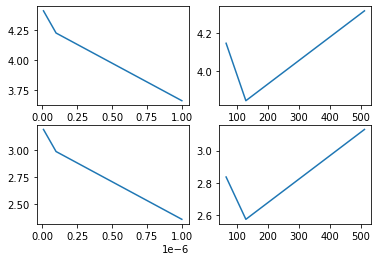

In [100]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(x_lr, f1_lr)
ax[0, 1].plot(x_bs, f1_bs)
ax[1, 0].plot(x_lr, acc_lr)
ax[1, 1].plot(x_bs, acc_bs)
plt.show()

In [30]:
print(test_results_ft[0.0001][16])

[{'acc_cie': 5.6247196052041275, 'precision_cie': 38.85522401726458, 'recall_cie': 5.6247196052041275, 'f1_cie': 7.824423112079672, 'acc_clus': 3.768506056527591, 'precision_clus': 6.4922136951878455, 'recall_clus': 3.768506056527591, 'f1_clus': 4.285940417700453, 'acc_dpt': 0.6336922386720503, 'precision_dpt': 21.513059245226138, 'recall_dpt': 0.6336922386720503, 'f1_dpt': 0.9059271678840707, 'acc_all': 3.342305966801256, 'precision_all': 22.286832319226193, 'recall_all': 3.342305966801256, 'f1_all': 4.3387635658880646}]


In [32]:
print(test_results_ft[0.0001][512])

[{'acc_cie': 4.660161507402423, 'precision_cie': 39.300376584265905, 'recall_cie': 4.660161507402423, 'f1_cie': 6.781791308267504, 'acc_clus': 5.108793180798565, 'precision_clus': 35.95366495488883, 'recall_clus': 5.108793180798565, 'f1_clus': 7.430344061725323, 'acc_dpt': 0.07290264692687304, 'precision_dpt': 0.8431255823584222, 'recall_dpt': 0.07290264692687304, 'f1_dpt': 0.1040290034056415, 'acc_all': 3.280619111709287, 'precision_all': 25.365722373837723, 'recall_all': 3.280619111709287, 'f1_all': 4.772054791132823}]


In [ ]:
print(test_results_ft[1e-6][16])

In [20]:
print(test_results_ft[1e-8][512])

[{'acc_cie': 0.8804396590399283, 'precision_cie': 100.0, 'recall_cie': 0.8804396590399283, 'f1_cie': 1.7455111457001502, 'acc_clus': 8.030506953790937, 'precision_clus': 100.0, 'recall_clus': 8.030506953790937, 'f1_clus': 14.867109634551495, 'acc_dpt': 0.0, 'precision_dpt': 0.0, 'recall_dpt': 0.0, 'f1_dpt': 0.0, 'acc_all': 2.9703155376102885, 'precision_all': 66.66666666666666, 'recall_all': 2.9703155376102885, 'f1_all': 5.537540260083882}]


In [15]:
print(test_results_sk[1e-6][512])

[{'acc_cie': 8.843651861821444, 'precision_cie': 39.82897957042372, 'recall_cie': 8.843651861821444, 'f1_cie': 10.412169137808155, 'acc_clus': 2.7478689995513683, 'precision_clus': 8.85801889255387, 'recall_clus': 2.7478689995513683, 'f1_clus': 3.151614198976517, 'acc_dpt': 5.25459847465231, 'precision_dpt': 28.364912774321247, 'recall_dpt': 5.25459847465231, 'f1_dpt': 5.574430226251421, 'acc_all': 5.615373112008375, 'precision_all': 25.683970412432956, 'recall_all': 5.615373112008375, 'f1_all': 6.37940452101203}]


In [77]:
bag_type = "dpt"
input_type = "hadamard"
rep_type = "sk"

In [78]:
res_path = os.path.join(CFG["datadir"], "EVAL_gs_wd_disc_spe_" + bag_type + "_" + rep_type + "_" + input_type)
with open(res_path, "rb") as f:
    test_results = pkl.load(f)

In [80]:
get_best_params(test_results, bag_type, weight_decay=False, mid_size=True)

Evaluated for lr= [dict_keys([0.0001, 1e-06, 1e-08])], bs=[dict_keys([64, 512, 16])], ms=[dict_keys([200, 600, 1000])]


((0.0001, 64, 1000), (0.0001, 512, 1000))

In [76]:
print(test_results[1e-06][64])

[{'acc_dpt': 4.306864064602961, 'precision_dpt': 6.989151202908128, 'recall_dpt': 4.306864064602961, 'f1_dpt': 4.039313172451967, 'acc_dpt_@10': 9.931583669807088, 'precision_dpt_@10': 24.379043654501782, 'recall_dpt_@10': 9.931583669807088, 'f1_dpt_@10': 10.847932639540273}]


In [68]:
input_type = "bagTransformer"
rep_type = "ft"

In [69]:
res_path = os.path.join(CFG["datadir"], "EVAL_gs_wd_topK_disc_poly_" + rep_type + "_" + input_type)
with open(res_path, "rb") as f:
    test_results = pkl.load(f)

In [70]:
get_best_params(test_results, bag_type, weight_decay=True, mid_size=False)

((1e-07, 512, 0.0), (1e-07, 512, 0.0))

In [71]:
test_results[1e-07][512][0.0][0]

{'acc_cie': 4.267608793180798,
 'precision_cie': 35.51265850376277,
 'recall_cie': 4.267608793180798,
 'f1_cie': 6.155314098760766,
 'acc_cie_@5': 18.433153880663973,
 'precision_cie_@5': 61.72905888684706,
 'recall_cie_@5': 18.433153880663973,
 'f1_cie_@5': 19.21898955204087,
 'acc_cie_@10': 29.72184836249439,
 'precision_cie_@10': 67.08886565652725,
 'recall_cie_@10': 29.72184836249439,
 'f1_cie_@10': 28.605327219417156,
 'acc_clus': 4.9069089277703,
 'precision_clus': 61.31169661448458,
 'recall_clus': 4.9069089277703,
 'f1_clus': 7.042376573008961,
 'acc_clus_@5': 22.84096007178107,
 'precision_clus_@5': 70.46998895955737,
 'recall_clus_@5': 22.84096007178107,
 'f1_clus_@5': 24.5147416899325,
 'acc_clus_@10': 42.51345895020188,
 'precision_clus_@10': 81.59382709914982,
 'recall_clus_@10': 42.51345895020188,
 'f1_clus_@10': 44.368401145489806,
 'acc_dpt': 0.0616868550919695,
 'precision_dpt': 0.37767022120992505,
 'recall_dpt': 0.0616868550919695,
 'f1_dpt': 0.06885932858814693,
 'a

In [53]:
rep_type = "sk"
input_type = "matMul"
bag_type = "cie"

In [39]:
res_path = os.path.join(CFG["datadir"], "EVAL_gs_wd_1ep_disc_spe_" + bag_type + "_" + rep_type + "_" + input_type)
with open(res_path, "rb") as f:
    test_results = pkl.load(f)
get_best_params(test_results, bag_type, weight_decay=True, mid_size=False)

FileNotFoundError: [Errno 2] No such file or directory: '/local/gainondefor/work/lip6/data/companies/EVAL_gs_wd_1ep_disc_spe_cie_sk_matMul'

In [36]:
test_results

{1e-08: {64: {0.0: [{'acc_clus': 4.800358905338717,
     'precision_clus': 60.52678754504191,
     'recall_clus': 4.800358905338717,
     'f1_clus': 6.889543844743576,
     'acc_clus_@10': 42.199416778824585,
     'precision_clus_@10': 81.04265822659728,
     'recall_clus_@10': 42.199416778824585,
     'f1_clus_@10': 44.00295316244394}],
   0.4: [{'acc_clus': 4.794751009421265,
     'precision_clus': 60.53041319376196,
     'recall_clus': 4.794751009421265,
     'f1_clus': 6.883020711225325,
     'acc_clus_@10': 42.193808882907135,
     'precision_clus_@10': 81.04029695953999,
     'recall_clus_@10': 42.193808882907135,
     'f1_clus_@10': 43.994498562169795}],
   0.8: [{'acc_clus': 4.800358905338717,
     'precision_clus': 60.52678754504191,
     'recall_clus': 4.800358905338717,
     'f1_clus': 6.889543844743576,
     'acc_clus_@10': 42.199416778824585,
     'precision_clus_@10': 81.03318754629608,
     'recall_clus_@10': 42.199416778824585,
     'f1_clus_@10': 44.00030692097221}]},
